In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 라이브러리 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
import os

In [ ]:
# 폰트 설정
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [ ]:
# 폰트 적용
font_family = get_font_family()
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


### 데이터 준비

In [ ]:
path_dir = '/content/gdrive/MyDrive/Data Analysis/Aiffel/HAC/03/data'
file_list = os.listdir(path_dir)
file_list

['상가업소정보_201912_01.csv',
 '상가업소정보_201912_02.csv',
 '상가업소정보_201912_03.csv',
 '상가업소정보_201912_04.csv',
 'popl.csv',
 'dlvr_call.csv',
 'StartupOrClosing_Region_ver2.csv',
 'StartupOrClosing_Shop_ver2.csv',
 'revised_demand_data.csv',
 '미세먼지',
 '날씨',
 'weather_gyeonggi_2019.csv',
 'pm2.5_gyeonggi_2019.csv',
 'pm10_gyeonggi_2019.csv',
 'raw',
 'revised_demand_data_kyunghyun.csv',
 'revised_demand_data_fill_particulatematter.csv',
 'revised_demand_data_fill.csv',
 'Untitled0.ipynb',
 '202109_연령별인구현황_경기도.xlsx',
 '202109_연령별인구현황_부산.xlsx',
 '202109_연령별인구현황_세종.xlsx',
 '202109_연령별인구현황_울산.xlsx',
 '202109_연령별인구현황_전라북도.xlsx',
 '전국 대학교 현황_201910_주소포함.xlsx',
 '시군구별 면적_211115.csv',
 '경기,전주 행정구역 면적.xlsx',
 'socar_region_univ_info.csv',
 'socar_region_area.csv',
 'socar_region_population.csv',
 'TC_GS_NATIVE_INDUTY_CNSMP_2020121811380

In [ ]:
df_gg = pd.read_excel(path_dir + '/202109_연령별인구현황_경기도.xlsx', thousands=',')
df_jb = pd.read_excel(path_dir + '/202109_연령별인구현황_전라북도.xlsx', thousands=',')
df_sj = pd.read_excel(path_dir + '/202109_연령별인구현황_세종.xlsx', thousands=',')
df_ps = pd.read_excel(path_dir + '/202109_연령별인구현황_부산.xlsx', thousands=',')
df_us = pd.read_excel(path_dir + '/202109_연령별인구현황_울산.xlsx', thousands=',')

In [ ]:
# 경기
df_gg.head()

,행정기관코드,행정기관,총인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,남 인구수,연령구간인구수.1,0~9세.1,10~19세.1,20~29세.1,30~39세.1,40~49세.1,50~59세.1,60~69세.1,70~79세.1,80~89세.1,90~99세.1,100세 이상.1,여 인구수,연령구간인구수.2,0~9세.2,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,4113100000,경기도 성남시 수정구,235530,235530,14908,16893,33928,34843,36304,39959,34477,16810,6476,872,60,119231,119231,7542,8636,17869,18621,19159,20448,16759,7632,2350,199,16,116299,116299,7366,8257,16059,16222,17145,19511,17718,9178,4126,673,44
1,4113300000,경기도 성남시 중원구,213280,213280,12638,15885,30383,30989,31993,37177,32113,15255,5937,849,61,108053,108053,6458,8191,15749,16726,16833,18896,15870,7003,2158,158,11,105227,105227,6180,7694,14634,14263,15160,18281,16243,8252,3779,691,50
2,4113500000,경기도 성남시 분당구,482950,482950,38883,52973,64445,69545,85247,77803,52627,25518,13352,2476,81,234212,234212,19959,27108,32402,33651,39619,38261,25708,11586,5222,677,19,248738,248738,18924,25865,32043,35894,45628,39542,26919,13932,8130,1799,62
3,4115000000,경기도 의정부시,463562,463562,33364,41766,64724,60002,73814,80975,60824,31252,14833,1934,74,228451,228451,17220,21600,32778,30678,37119,39826,29449,13770,5542,455,14,235111,235111,16144,20166,31946,29324,36695,41149,31375,17482,9291,1479,60
4,4117100000,경기도 안양시 만안구,239356,239356,15041,18294,34052,33362,34429,42916,36387,16587,7238,1007,43,119850,119850,7621,9547,17782,17649,17715,21038,17901,7770,2597,219,11,119506,119506,7420,8747,16270,15713,16714,21878,18486,8817,4641,788,32


In [ ]:
df_gg = df_gg[['행정기관', '총인구수', '0~9세', '10~19세', '20~29세',
       '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세',
       '100세 이상']].copy()
df_gg['60대이상'] = df_gg['60~69세'] + df_gg['70~79세'] + df_gg['80~89세'] + df_gg['90~99세'] + df_gg['100세 이상']
df_gg['20대이상인구'] = df_gg['총인구수'] - df_gg['0~9세'] - df_gg['10~19세']
df_gg = df_gg.drop(['총인구수', '0~9세', '10~19세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'], axis=1)

In [ ]:
df_gg = df_gg.rename(columns={'20대이상인구':0, '20~29세':1, '30~39세':2, '40~49세':3, '50~59세':4, '60대이상':5})
df_gg

,행정기관,1,2,3,4,5,0
0,경기도 성남시 수정구,33928,34843,36304,39959,58695,203729
1,경기도 성남시 중원구,30383,30989,31993,37177,54215,184757
2,경기도 성남시 분당구,64445,69545,85247,77803,94054,391094
3,경기도 의정부시,64724,60002,73814,80975,108917,388432
4,경기도 안양시 만안구,34052,33362,34429,42916,61262,206021
5,경기도 안양시 동안구,41880,43823,51577,53129,62278,252687
6,경기도 광명시,37204,40452,50210,49107,65843,242816
7,경기도 고양시 덕양구,62335,68591,78590,83694,109848,403058
8,경기도 고양시 일산동구,44398,38285,50069,56501,61738,250991
9,경기도 고양시 일산서구,41458,35729,50116,56313,61205,244821


In [ ]:
df_gg = df_gg.melt(id_vars=['행정기관'], value_vars=[0,1,2,3,4,5])
df_gg.columns = ['region', 'age_group', 'population']
df_gg

,region,age_group,population
0,경기도 성남시 수정구,0,203729
1,경기도 성남시 중원구,0,184757
2,경기도 성남시 분당구,0,391094
3,경기도 의정부시,0,388432
4,경기도 안양시 만안구,0,206021
...,...,...,...
91,경기도 남양주시,5,158456
92,경기도 하남시,5,62634
93,경기도 김포시,5,92571
94,경기도 화성시,5,127442


In [ ]:
# 전북
df_jb.head()

,행정기관코드,행정기관,총인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,남 인구수,연령구간인구수.1,0~9세.1,10~19세.1,20~29세.1,30~39세.1,40~49세.1,50~59세.1,60~69세.1,70~79세.1,80~89세.1,90~99세.1,100세 이상.1,여 인구수,연령구간인구수.2,0~9세.2,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,4511100000,전라북도 전주시 완산구,337671,337671,23583,34965,49220,39520,51903,57229,44161,24289,11049,1692,60,164477,164477,12133,18192,25529,20050,24875,27703,20756,10840,4006,382,11,173194,173194,11450,16773,23691,19470,27028,29526,23405,13449,7043,1310,49
1,4511300000,전라북도 전주시 덕진구,320564,320564,28476,35372,44138,41907,53441,49757,36243,20506,9402,1288,34,159450,159450,14546,18156,23521,21143,26692,25007,17418,9158,3501,304,4,161114,161114,13930,17216,20617,20764,26749,24750,18825,11348,5901,984,30


In [ ]:
df_jb = df_jb[['행정기관', '총인구수', '0~9세', '10~19세', '20~29세',
       '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세',
       '100세 이상']].copy()
df_jb['60대이상'] = df_jb['60~69세'] + df_jb['70~79세'] + df_jb['80~89세'] + df_jb['90~99세'] + df_jb['100세 이상']
df_jb['20대이상인구'] = df_jb['총인구수'] - df_jb['0~9세'] - df_jb['10~19세']
df_jb = df_jb.drop(['총인구수', '0~9세', '10~19세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'], axis=1)

In [ ]:
df_jb = df_jb.rename(columns={'20대이상인구':0, '20~29세':1, '30~39세':2, '40~49세':3, '50~59세':4, '60대이상':5})
df_jb

,행정기관,1,2,3,4,5,0
0,전라북도 전주시 완산구,49220,39520,51903,57229,81251,279123
1,전라북도 전주시 덕진구,44138,41907,53441,49757,67473,256716


In [ ]:
df_jb = df_jb.melt(id_vars=['행정기관'], value_vars=[0,1,2,3,4,5])
df_jb.columns = ['region', 'age_group', 'population']
df_jb

,region,age_group,population
0,전라북도 전주시 완산구,0,279123
1,전라북도 전주시 덕진구,0,256716
2,전라북도 전주시 완산구,1,49220
3,전라북도 전주시 덕진구,1,44138
4,전라북도 전주시 완산구,2,39520
5,전라북도 전주시 덕진구,2,41907
6,전라북도 전주시 완산구,3,51903
7,전라북도 전주시 덕진구,3,53441
8,전라북도 전주시 완산구,4,57229
9,전라북도 전주시 덕진구,4,49757


In [ ]:
# 세종
df_sj['행정기관'] = df_sj['행정기관'].str.replace('세종특별자치시', '세종특별자치시 세종시')
df_sj.head()

,행정기관코드,행정기관,총인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,남 인구수,연령구간인구수.1,0~9세.1,10~19세.1,20~29세.1,30~39세.1,40~49세.1,50~59세.1,60~69세.1,70~79세.1,80~89세.1,90~99세.1,100세 이상.1,여 인구수,연령구간인구수.2,0~9세.2,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,3600000000,세종특별자치시 세종시,366560,366560,46960,44826,38131,61187,71533,47566,32942,14652,7442,1283,38,183044,183044,23953,22595,19501,29846,36286,24873,16368,6807,2544,262,9,183516,183516,23007,22231,18630,31341,35247,22693,16574,7845,4898,1021,29


In [ ]:
df_sj = df_sj[['행정기관', '총인구수', '0~9세', '10~19세', '20~29세',
       '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세',
       '100세 이상']].copy()
df_sj['60대이상'] = df_sj['60~69세'] + df_sj['70~79세'] + df_sj['80~89세'] + df_sj['90~99세'] + df_sj['100세 이상']
df_sj['20대이상인구'] = df_sj['총인구수'] - df_sj['0~9세'] - df_sj['10~19세']
df_sj = df_sj.drop(['총인구수', '0~9세', '10~19세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'], axis=1)

In [ ]:
df_sj = df_sj.rename(columns={'20대이상인구':0, '20~29세':1, '30~39세':2, '40~49세':3, '50~59세':4, '60대이상':5})
df_sj

,행정기관,1,2,3,4,5,0
0,세종특별자치시 세종시,38131,61187,71533,47566,56357,274774


In [ ]:
df_sj = df_sj.melt(id_vars=['행정기관'], value_vars=[0,1,2,3,4,5])
df_sj.columns = ['region', 'age_group', 'population']
df_sj

,region,age_group,population
0,세종특별자치시 세종시,0,274774
1,세종특별자치시 세종시,1,38131
2,세종특별자치시 세종시,2,61187
3,세종특별자치시 세종시,3,71533
4,세종특별자치시 세종시,4,47566
5,세종특별자치시 세종시,5,56357


In [ ]:
# 부산
df_ps.head()

,행정기관코드,행정기관,총인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,남 인구수,연령구간인구수.1,0~9세.1,10~19세.1,20~29세.1,30~39세.1,40~49세.1,50~59세.1,60~69세.1,70~79세.1,80~89세.1,90~99세.1,100세 이상.1,여 인구수,연령구간인구수.2,0~9세.2,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2644000000,부산광역시 강서구,142104,142104,19871,12659,12715,27103,25451,17058,16880,7084,2797,463,23,73623,73623,10300,6451,6939,13811,14141,8847,8536,3542,965,85,6,68481,68481,9571,6208,5776,13292,11310,8211,8344,3542,1832,378,17


In [ ]:
df_ps = df_ps[['행정기관', '총인구수', '0~9세', '10~19세', '20~29세',
       '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세',
       '100세 이상']].copy()
df_ps['60대이상'] = df_ps['60~69세'] + df_ps['70~79세'] + df_ps['80~89세'] + df_ps['90~99세'] + df_ps['100세 이상']
df_ps['20대이상인구'] = df_ps['총인구수'] - df_ps['0~9세'] - df_ps['10~19세']
df_ps = df_ps.drop(['총인구수', '0~9세', '10~19세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'], axis=1)

In [ ]:
df_ps = df_ps.rename(columns={'20대이상인구':0, '20~29세':1, '30~39세':2, '40~49세':3, '50~59세':4, '60대이상':5})
df_ps

,행정기관,1,2,3,4,5,0
0,부산광역시 강서구,12715,27103,25451,17058,27247,109574


In [ ]:
df_ps = df_ps.melt(id_vars=['행정기관'], value_vars=[0,1,2,3,4,5])
df_ps.columns = ['region', 'age_group', 'population']
df_ps

,region,age_group,population
0,부산광역시 강서구,0,109574
1,부산광역시 강서구,1,12715
2,부산광역시 강서구,2,27103
3,부산광역시 강서구,3,25451
4,부산광역시 강서구,4,17058
5,부산광역시 강서구,5,27247


In [ ]:
# 울산
df_us = df_us.drop(0, axis=0)
df_us.head()

,행정기관코드,행정기관,총인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,남 인구수,연령구간인구수.1,0~9세.1,10~19세.1,20~29세.1,30~39세.1,40~49세.1,50~59세.1,60~69세.1,70~79세.1,80~89세.1,90~99세.1,100세 이상.1,여 인구수,연령구간인구수.2,0~9세.2,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
1,3111000000,울산광역시 중구,213833,213833,15602,19620,25592,25422,33310,40280,33304,14703,5356,628,16,108235,108235,8024,10436,14311,13360,17021,20056,16218,6814,1891,102,2,105598,105598,7578,9184,11281,12062,16289,20224,17086,7889,3465,526,14
2,3114000000,울산광역시 남구,315118,315118,22800,29354,44019,41186,49910,60829,43434,16968,5908,690,20,160693,160693,11710,15509,24543,22028,24565,30404,21619,8096,2098,120,1,154425,154425,11090,13845,19476,19158,25345,30425,21815,8872,3810,570,19
3,3117000000,울산광역시 동구,154566,154566,13994,15575,17012,21666,26052,24912,23696,8679,2608,363,9,80683,80683,7136,8269,9529,11899,14177,12522,11775,4429,891,54,2,73883,73883,6858,7306,7483,9767,11875,12390,11921,4250,1717,309,7
4,3120000000,울산광역시 북구,217736,217736,24221,23659,26429,32911,38691,38581,21836,7762,3165,462,19,112757,112757,12482,12259,15150,17112,19827,19742,11497,3651,963,70,4,104979,104979,11739,11400,11279,15799,18864,18839,10339,4111,2202,392,15
5,3171000000,울산광역시 울주군,221983,221983,16791,22047,26092,25017,36293,42201,31724,14073,6697,1026,22,114725,114725,8642,11448,14937,13369,18578,22265,16437,6675,2183,189,2,107258,107258,8149,10599,11155,11648,17715,19936,15287,7398,4514,837,20


In [ ]:
df_us = df_us[['행정기관', '총인구수', '0~9세', '10~19세', '20~29세',
       '30~39세', '40~49세', '50~59세', '60~69세', '70~79세', '80~89세', '90~99세',
       '100세 이상']].copy()
df_us['60대이상'] = df_us['60~69세'] + df_us['70~79세'] + df_us['80~89세'] + df_us['90~99세'] + df_us['100세 이상']
df_us['20대이상인구'] = df_us['총인구수'] - df_us['0~9세'] - df_us['10~19세']
df_us = df_us.drop(['총인구수', '0~9세', '10~19세', '60~69세', '70~79세', '80~89세', '90~99세', '100세 이상'], axis=1)

In [ ]:
df_us = df_us.rename(columns={'20대이상인구':0, '20~29세':1, '30~39세':2, '40~49세':3, '50~59세':4, '60대이상':5})
df_us

,행정기관,1,2,3,4,5,0
1,울산광역시 중구,25592,25422,33310,40280,54007,178611
2,울산광역시 남구,44019,41186,49910,60829,67020,262964
3,울산광역시 동구,17012,21666,26052,24912,35355,124997
4,울산광역시 북구,26429,32911,38691,38581,33244,169856
5,울산광역시 울주군,26092,25017,36293,42201,53542,183145


In [ ]:
df_us = df_us.melt(id_vars=['행정기관'], value_vars=[0,1,2,3,4,5])
df_us.columns = ['region', 'age_group', 'population']
df_us

,region,age_group,population
0,울산광역시 중구,0,178611
1,울산광역시 남구,0,262964
2,울산광역시 동구,0,124997
3,울산광역시 북구,0,169856
4,울산광역시 울주군,0,183145
5,울산광역시 중구,1,25592
6,울산광역시 남구,1,44019
7,울산광역시 동구,1,17012
8,울산광역시 북구,1,26429
9,울산광역시 울주군,1,26092


In [ ]:
df = pd.concat([df_gg, df_jb, df_sj, df_ps, df_us])
df

,region,age_group,population
0,경기도 성남시 수정구,0,203729
1,경기도 성남시 중원구,0,184757
2,경기도 성남시 분당구,0,391094
3,경기도 의정부시,0,388432
4,경기도 안양시 만안구,0,206021
...,...,...,...
25,울산광역시 중구,5,54007
26,울산광역시 남구,5,67020
27,울산광역시 동구,5,35355
28,울산광역시 북구,5,33244


In [ ]:
df.to_excel(path_dir + '/쏘카 지역 인구현황.xls', index=False)

In [ ]:
df = df[df['age_group'] != 0]
df

,region,age_group,population
16,경기도 성남시 수정구,1,33928
17,경기도 성남시 중원구,1,30383
18,경기도 성남시 분당구,1,64445
19,경기도 의정부시,1,64724
20,경기도 안양시 만안구,1,34052
...,...,...,...
25,울산광역시 중구,5,54007
26,울산광역시 남구,5,67020
27,울산광역시 동구,5,35355
28,울산광역시 북구,5,33244


In [ ]:
df.shape

(125, 3)

In [ ]:
df.to_csv(path_dir + '/socar_region_population.csv', index=False)

In [ ]:
pd.read_csv(path_dir + '/socar_region_population.csv')

,region,age_group,population
0,경기도 성남시 수정구,1,33928
1,경기도 성남시 중원구,1,30383
2,경기도 성남시 분당구,1,64445
3,경기도 의정부시,1,64724
4,경기도 안양시 만안구,1,34052
...,...,...,...
120,울산광역시 중구,5,54007
121,울산광역시 남구,5,67020
122,울산광역시 동구,5,35355
123,울산광역시 북구,5,33244


### 인구 구성비 계산

In [ ]:
def get_total_population(data):
  data = data[data['age_group'] != 0].copy()
  data_total = data.groupby('region').sum().reset_index()
  data = data.merge(data_total, how='left', on='region')
  data.columns = ['region', 'age_group', 'population', 'total_population']
  data['population_pct'] = data['population'] / data['total_population']
  return data

In [ ]:
df_ps = get_total_population(df_ps)
df_ps

,region,age_group,population,total_population,population_pct
0,부산광역시 강서구,1,12715,109574,0.116040
1,부산광역시 강서구,2,27103,109574,0.247349
2,부산광역시 강서구,3,25451,109574,0.232272
3,부산광역시 강서구,4,17058,109574,0.155676
4,부산광역시 강서구,5,27247,109574,0.248663


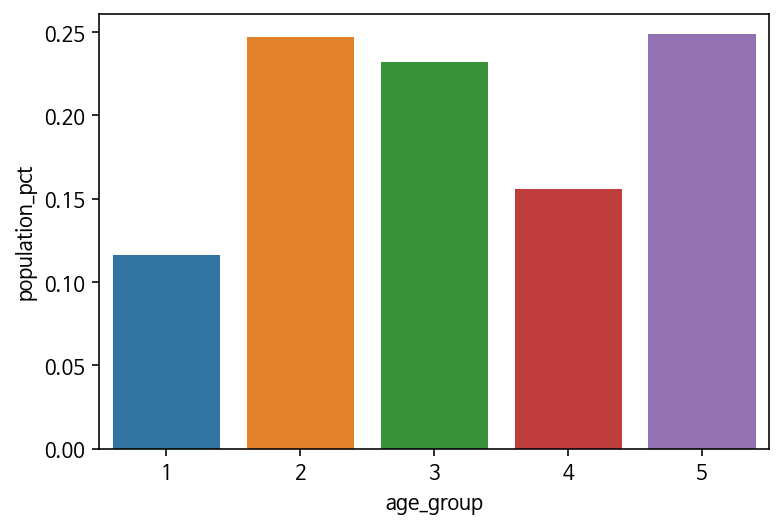

In [ ]:
sns.barplot(data=df_ps, x='age_group', y='population_pct')

In [ ]:
df_us = get_total_population(df_us)
df_us

,region,age_group,population,total_population,population_pct
0,울산광역시 중구,1,25592,178611,0.143283
1,울산광역시 남구,1,44019,262964,0.167396
2,울산광역시 동구,1,17012,124997,0.136099
3,울산광역시 북구,1,26429,169856,0.155597
4,울산광역시 울주군,1,26092,183145,0.142466
5,울산광역시 중구,2,25422,178611,0.142332
6,울산광역시 남구,2,41186,262964,0.156622
7,울산광역시 동구,2,21666,124997,0.173332
8,울산광역시 북구,2,32911,169856,0.193758
9,울산광역시 울주군,2,25017,183145,0.136597


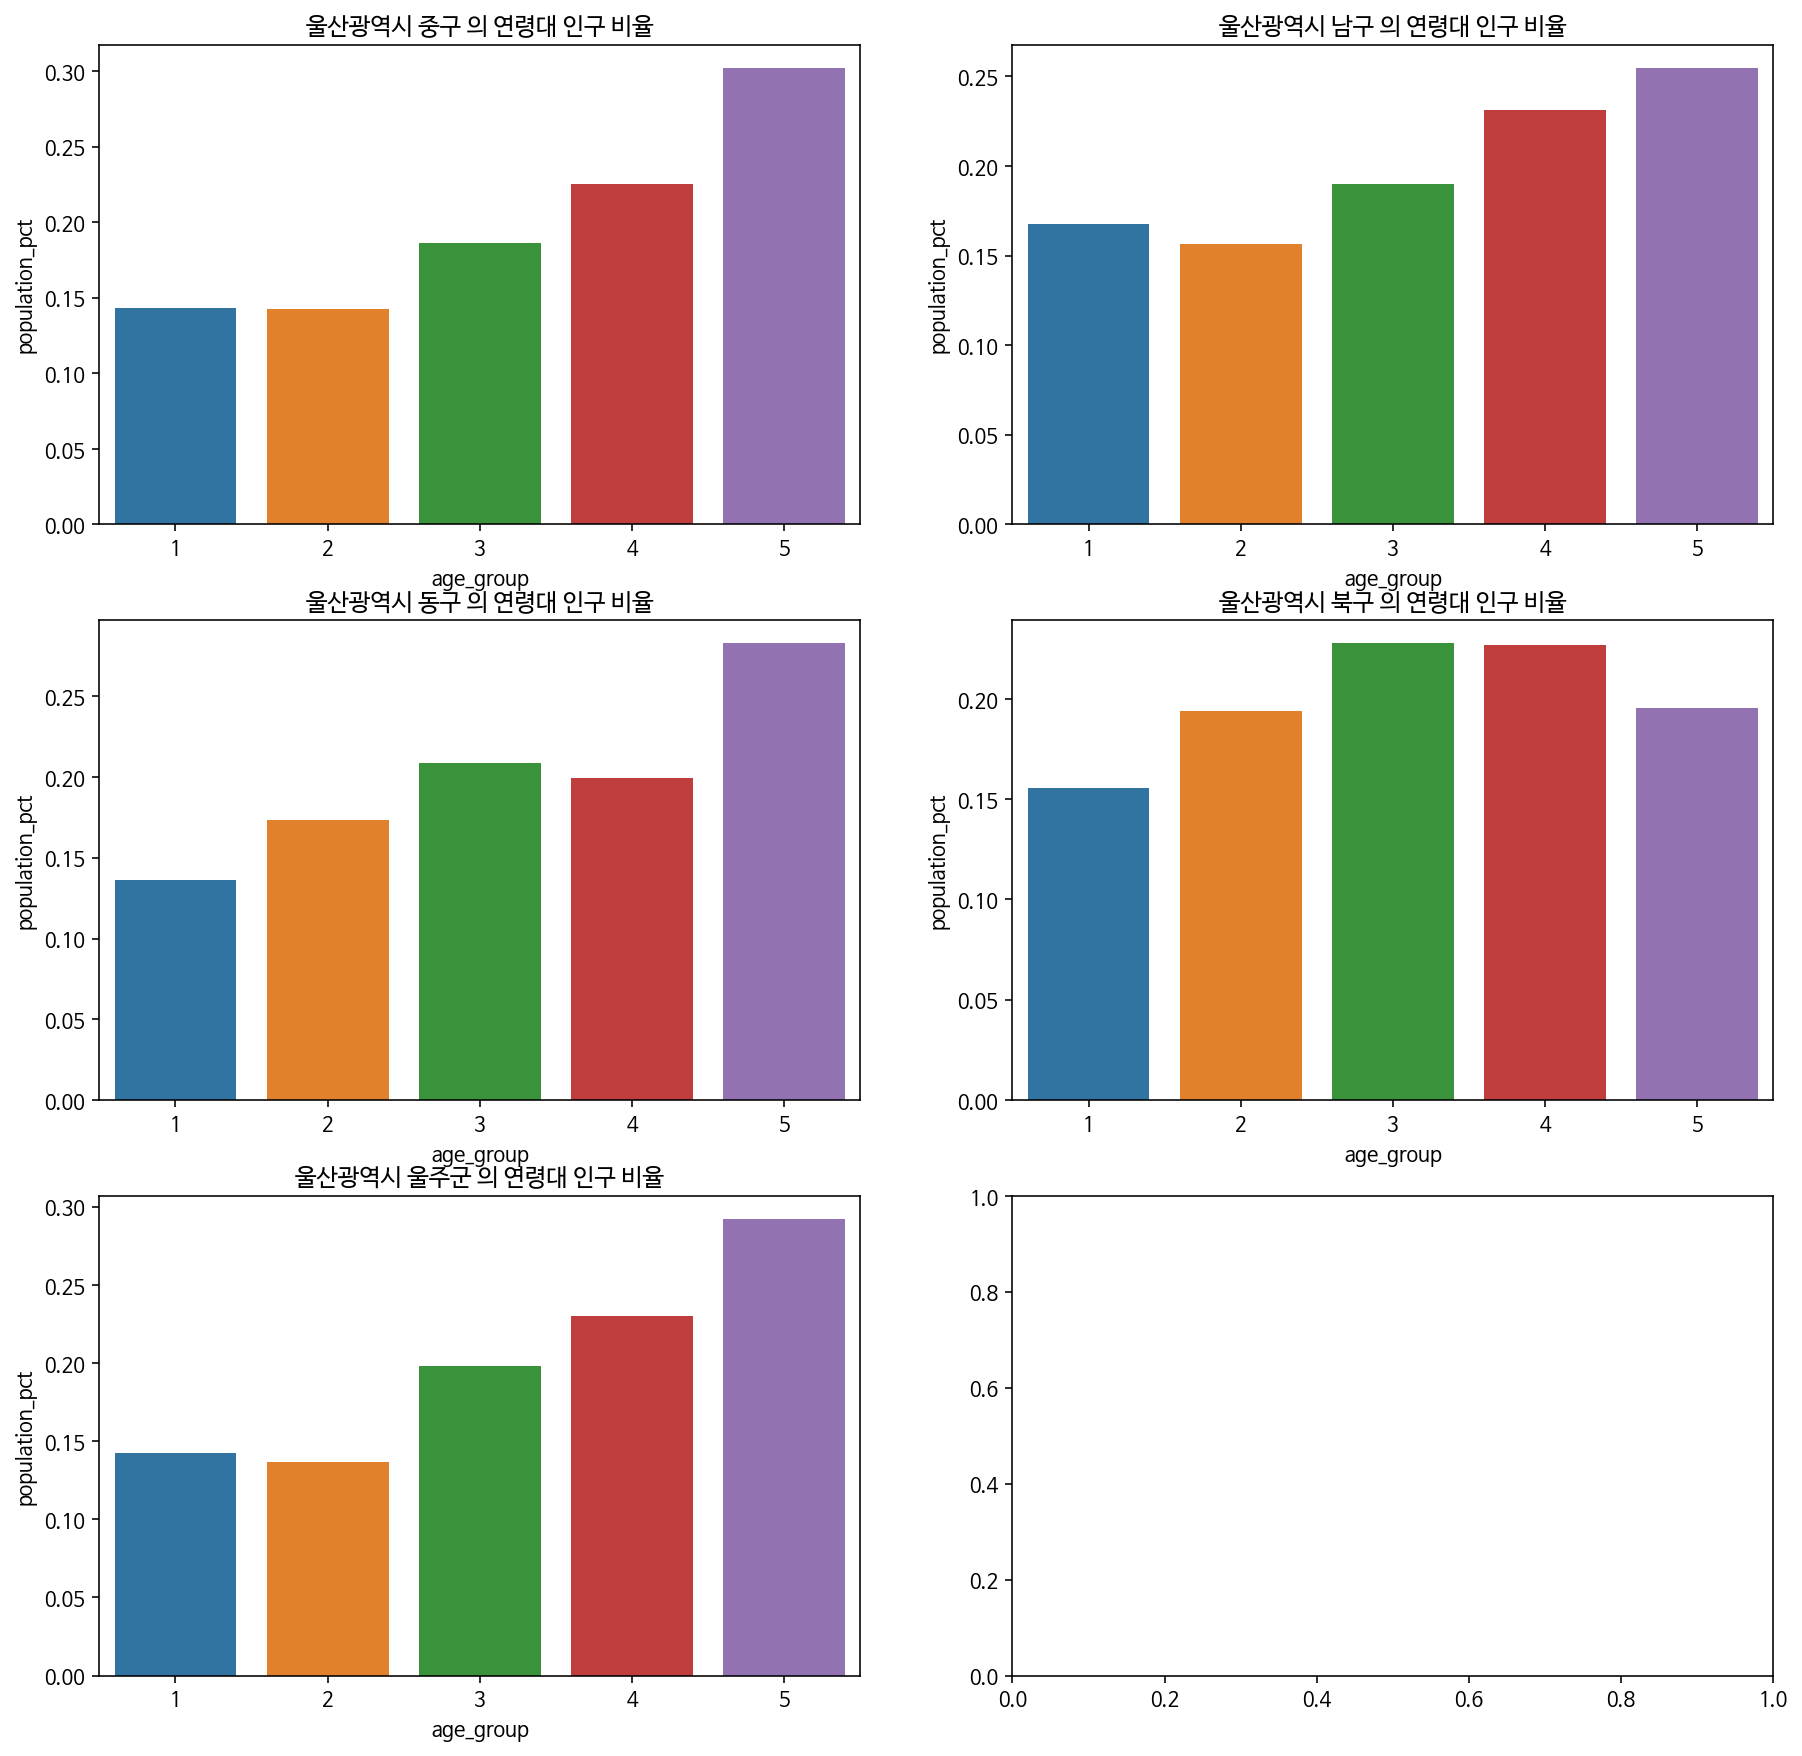

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

for i, region in enumerate(df_us['region'].unique()):
  sns.barplot(data=df_us[df_us['region'] == region], x='age_group', y='population_pct',  ci=None, ax = ax[i//2][i%2])
  ax[i//2][i%2].set_title(f"{region}의 연령대 인구 비율")
plt.show()

In [ ]:
df_gg = get_total_population(df_gg)
df_gg

,region,age_group,population,total_population,population_pct
0,경기도 성남시 수정구,1,33928,203729,0.166535
1,경기도 성남시 중원구,1,30383,184757,0.164448
2,경기도 성남시 분당구,1,64445,391094,0.164781
3,경기도 의정부시,1,64724,388432,0.166629
4,경기도 안양시 만안구,1,34052,206021,0.165284
...,...,...,...,...,...
75,경기도 남양주시,5,158456,586800,0.270034
76,경기도 하남시,5,62634,253095,0.247472
77,경기도 김포시,5,92571,381693,0.242527
78,경기도 화성시,5,127442,676875,0.188280


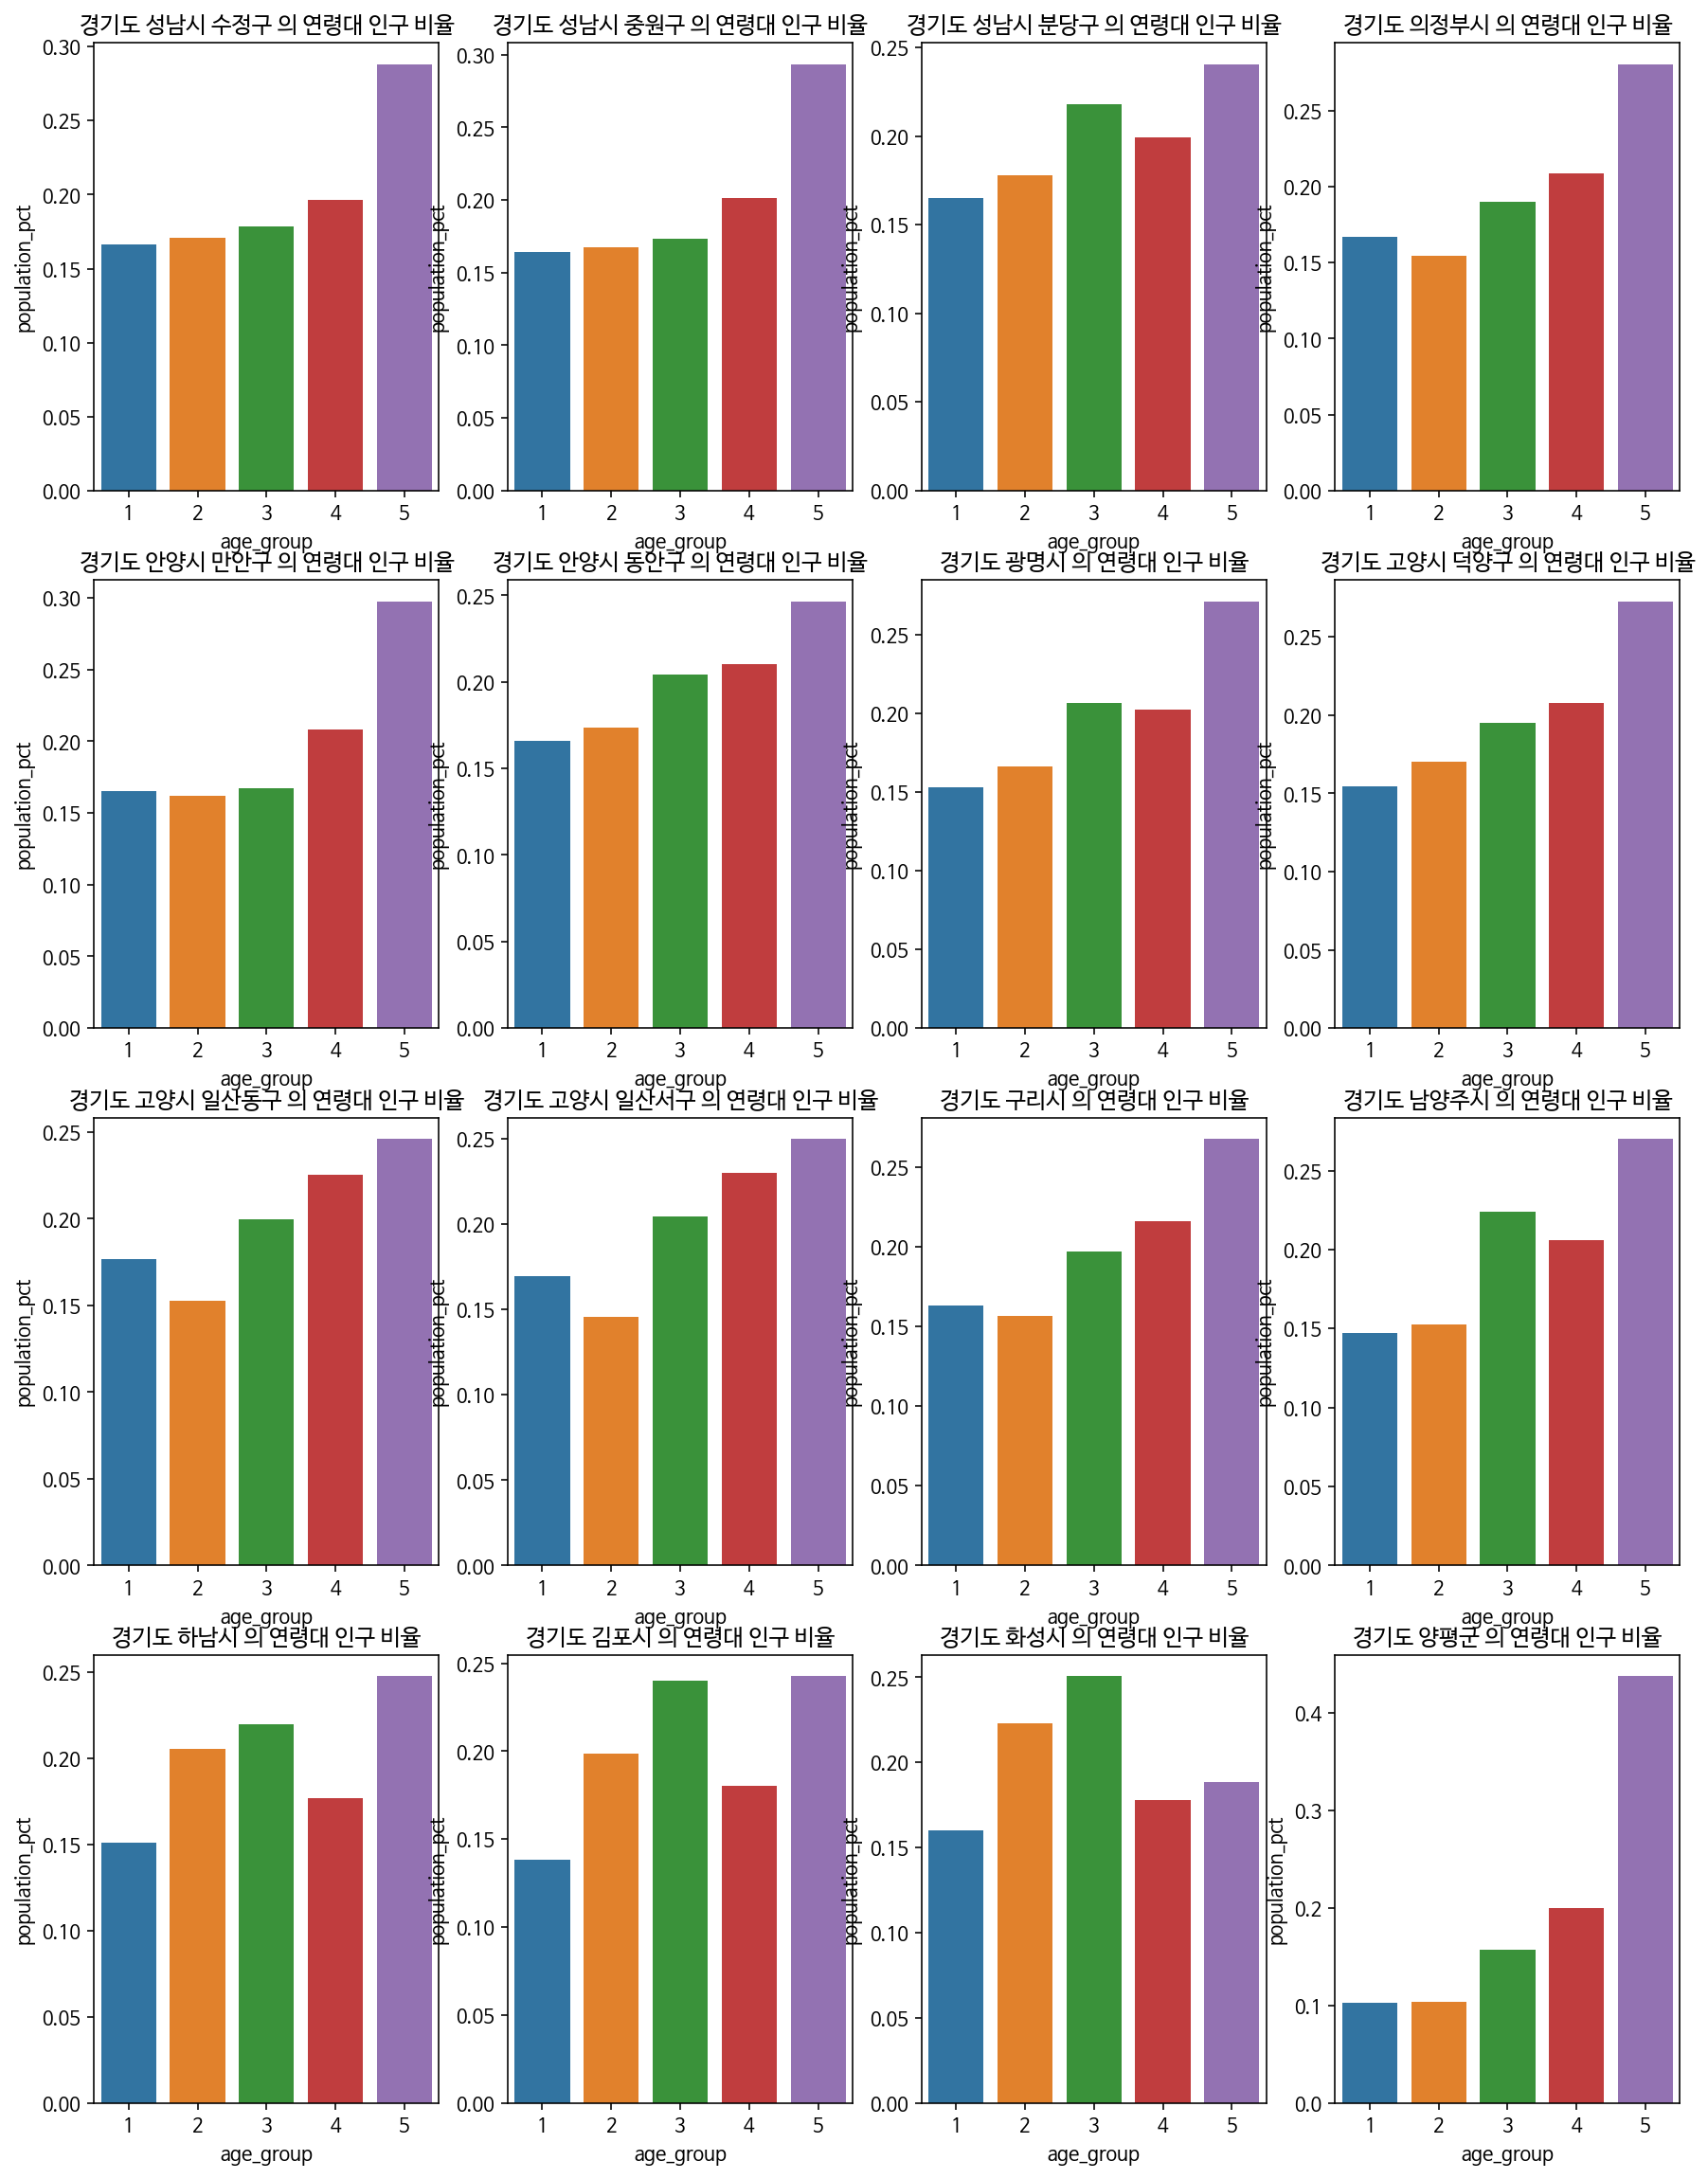

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,20))

for i, region in enumerate(df_gg['region'].unique()):
  sns.barplot(data=df_gg[df_gg['region'] == region], x='age_group', y='population_pct',  ci=None, ax = ax[i//4][i%4])
  ax[i//4][i%4].set_title(f"{region}의 연령대 인구 비율")
plt.show()

In [ ]:
df_sj = get_total_population(df_sj)
df_sj

,region,age_group,population,total_population,population_pct
0,세종특별자치시 세종시,1,38131,274774,0.138772
1,세종특별자치시 세종시,2,61187,274774,0.222681
2,세종특별자치시 세종시,3,71533,274774,0.260334
3,세종특별자치시 세종시,4,47566,274774,0.173110
4,세종특별자치시 세종시,5,56357,274774,0.205103


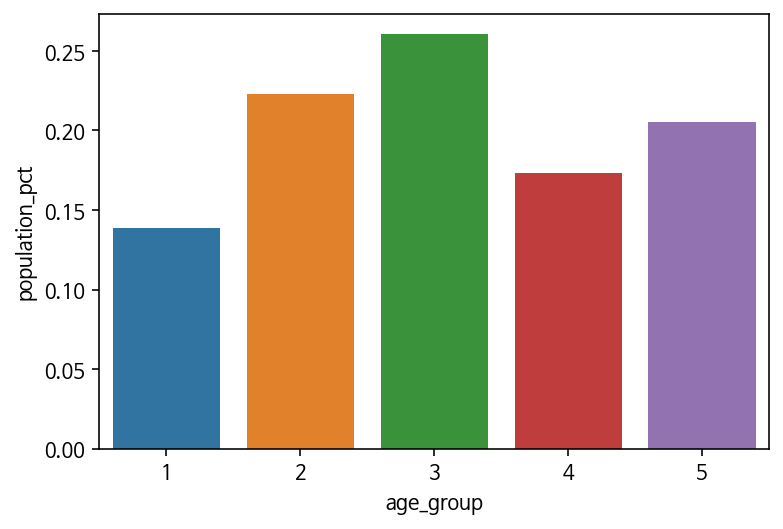

In [ ]:
sns.barplot(data=df_sj, x='age_group', y='population_pct')

In [ ]:
df_jb = get_total_population(df_jb)
df_jb

,region,age_group,population,total_population,population_pct
0,전라북도 전주시 완산구,1,49220,279123,0.176338
1,전라북도 전주시 덕진구,1,44138,256716,0.171933
2,전라북도 전주시 완산구,2,39520,279123,0.141586
3,전라북도 전주시 덕진구,2,41907,256716,0.163243
4,전라북도 전주시 완산구,3,51903,279123,0.185950
5,전라북도 전주시 덕진구,3,53441,256716,0.208172
6,전라북도 전주시 완산구,4,57229,279123,0.205031
7,전라북도 전주시 덕진구,4,49757,256716,0.193821
8,전라북도 전주시 완산구,5,81251,279123,0.291094
9,전라북도 전주시 덕진구,5,67473,256716,0.262831


In [ ]:
df_jb['region'].unique()

array(['전라북도 전주시 완산구 ', '전라북도 전주시 덕진구 '], dtype=object)